# РК №1

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline 
sns.set(style="ticks")

In [51]:
data = pd.read_csv('aghr.csv', sep=",")

In [52]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [53]:
data.shape

(400, 9)

In [54]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [55]:
# ищем пропуски
for c in data.columns:
    null_count = data[data[c].isnull()].shape[0]
    print(f'{c} - {null_count}')

Serial No. - 0
GRE Score - 0
TOEFL Score - 0
University Rating - 0
SOP - 0
LOR  - 0
CGPA - 0
Research - 0
Chance of Admit  - 0


In [56]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [57]:
# характеристки набора данных
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Диаграмма рассеяния
Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости.

Построим диаграмму рассеяния для двух признаков - GRE Score и Chance of Admit. Видим, что первый признак влияет на второй и между ними существует зависимость, с увеличением первого признака увеличивается и второй.

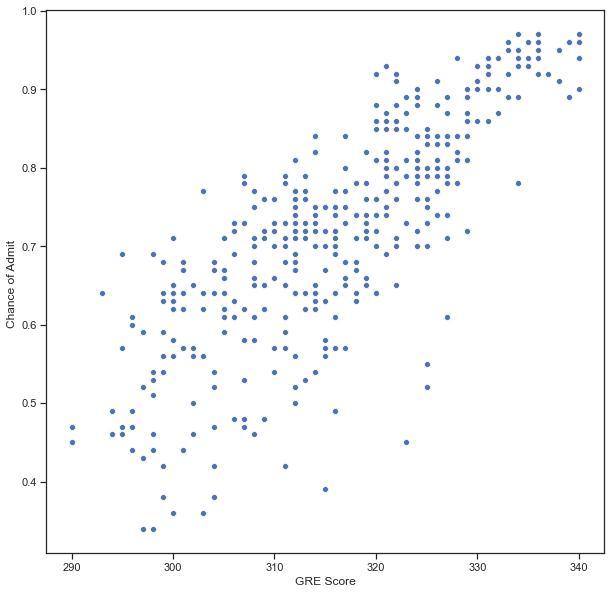

In [58]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='GRE Score', y='Chance of Admit ', data=data)

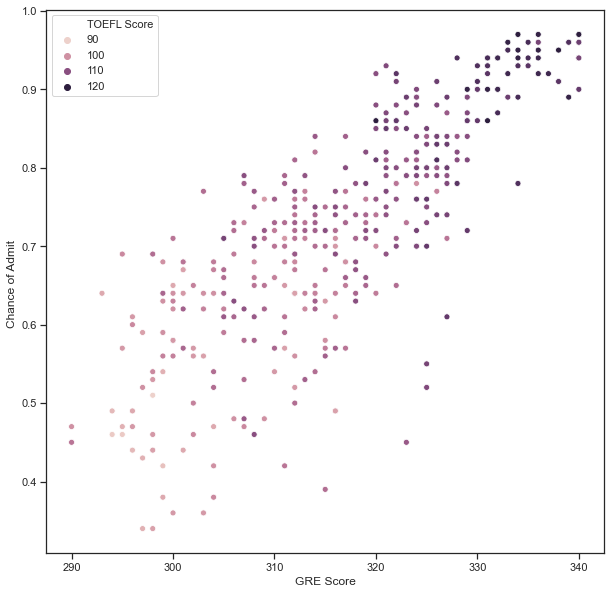

In [59]:
# Оценим влияние признака TOEFL Score на зависимость.
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='GRE Score', y='Chance of Admit ', data=data, hue='TOEFL Score')

## Гистограмма

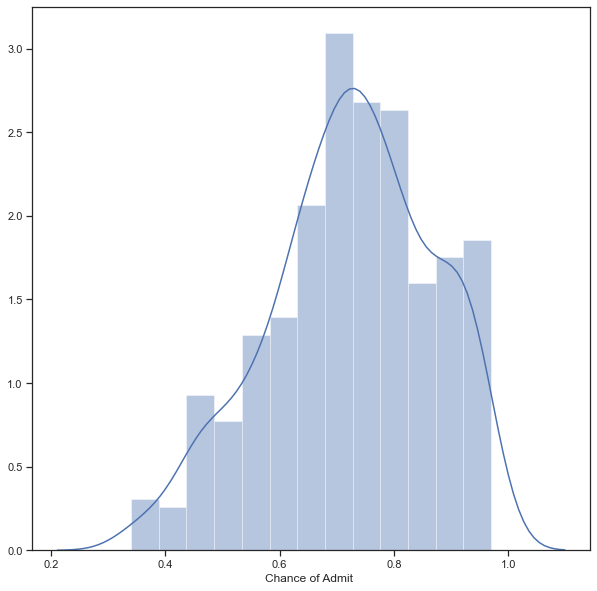

In [60]:
# Определение наиболее вероятного значения признака Chance of Admit
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Chance of Admit '])
# Выяснили, что это около 0.7

In [61]:
data['Chance of Admit '].median()

0.73

## Joinplot

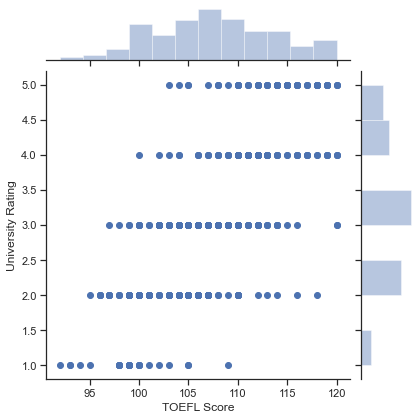

In [62]:
# joinplot отображает зависимость TOEFL Score от University Rating
p = sns.jointplot( "TOEFL Score", "University Rating", data)

## Парные диаграммы

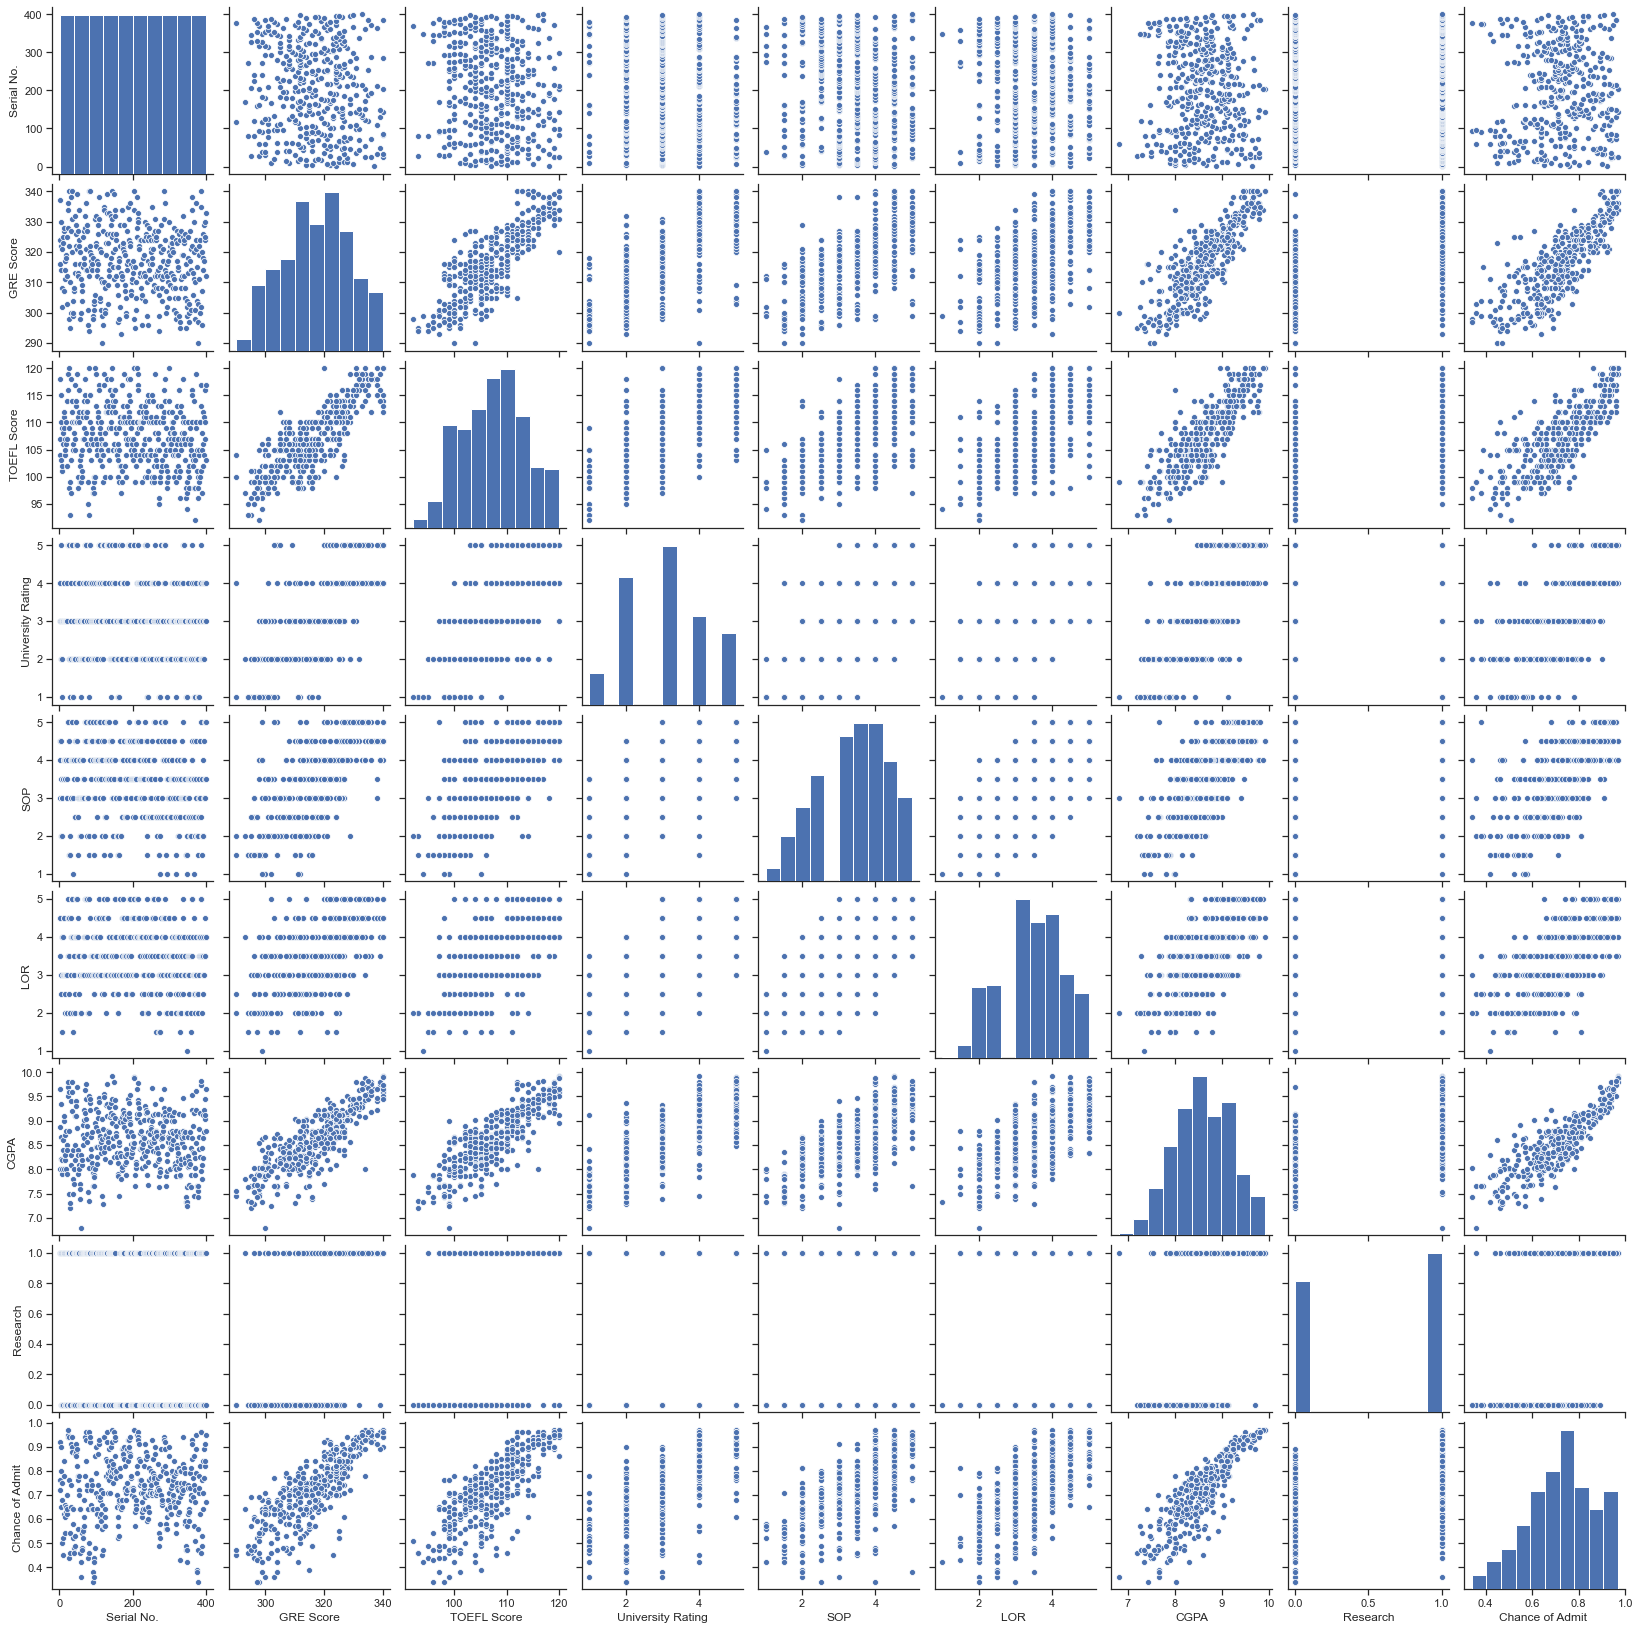

In [63]:
# Парные диаграммы по признакам датасета
sns.pairplot(data)

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to c

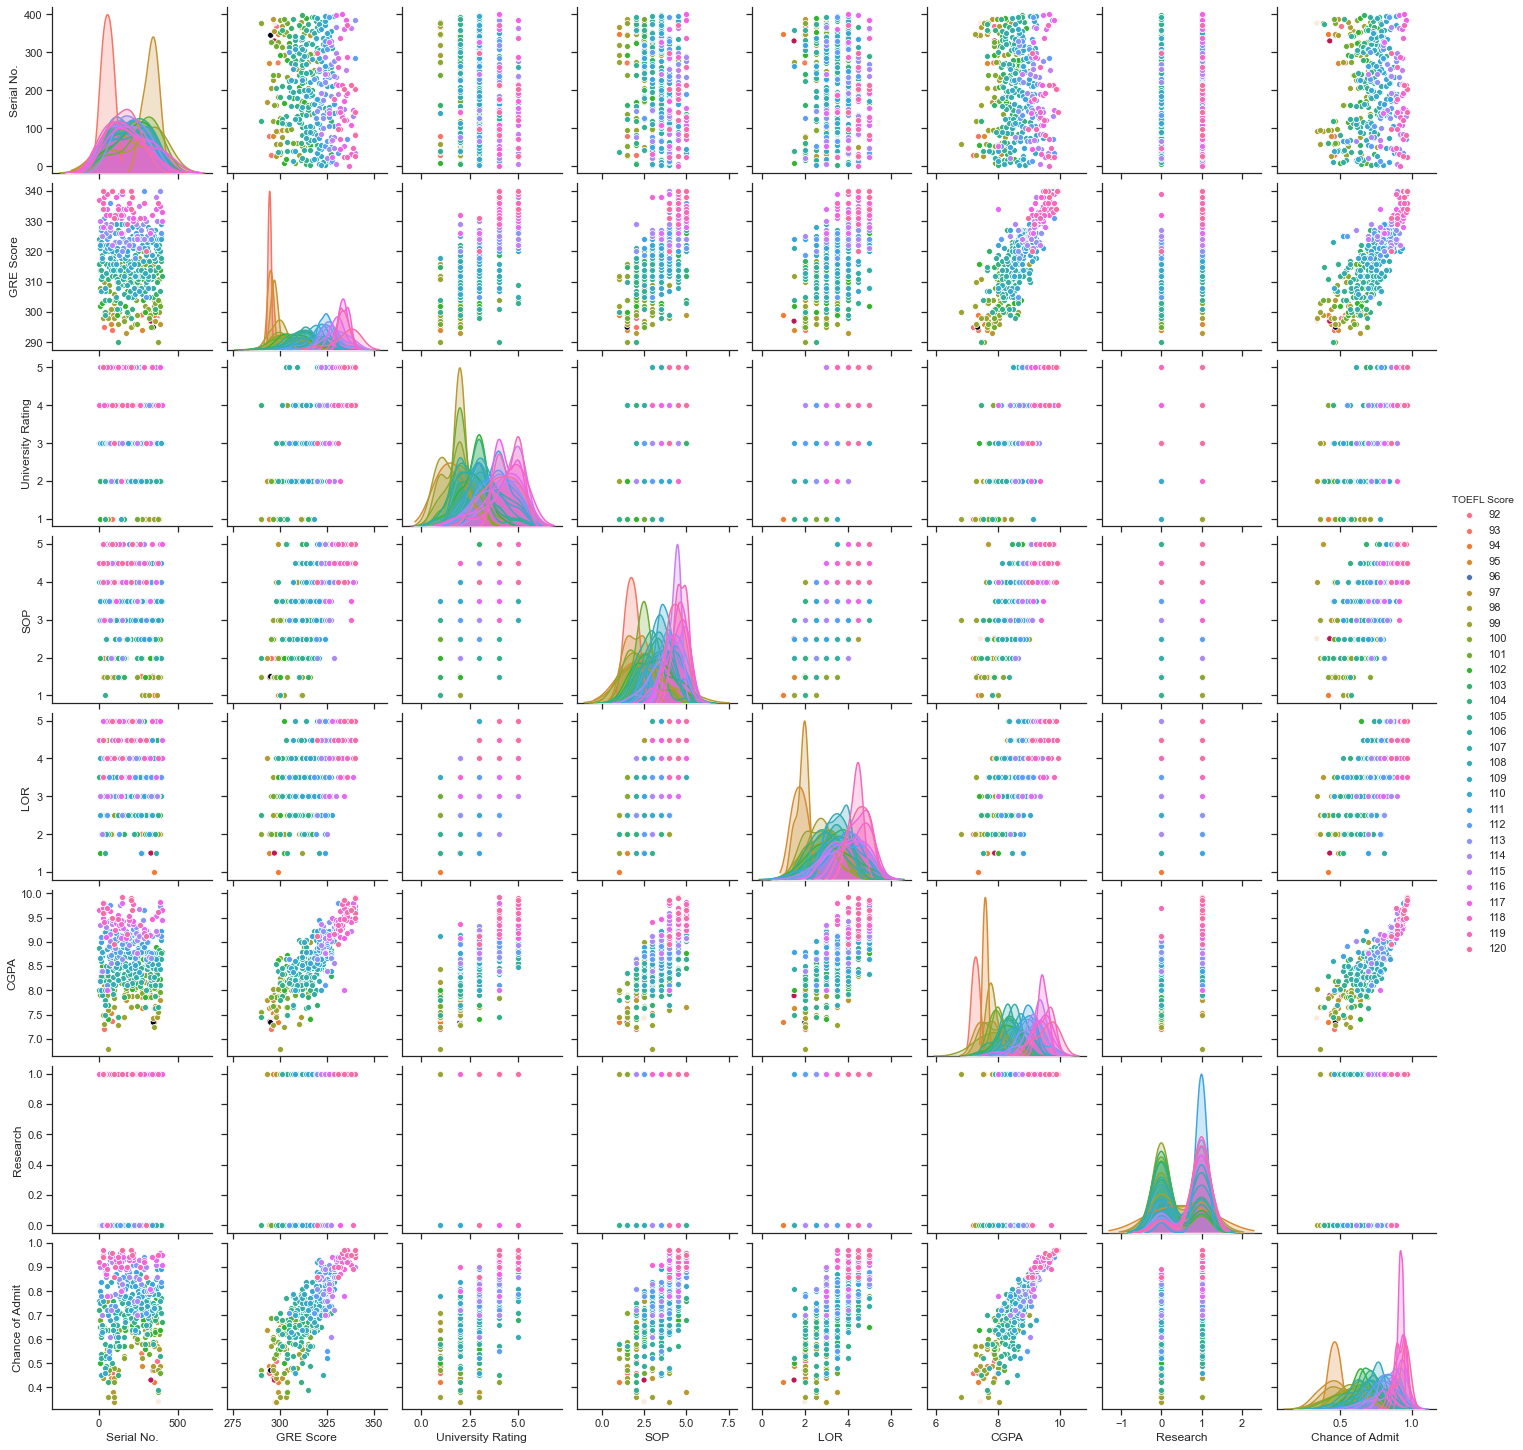

In [64]:
# Группировка по значениям признака TOEFL Score
sns.pairplot(data, hue="TOEFL Score")

## Ящик с усами

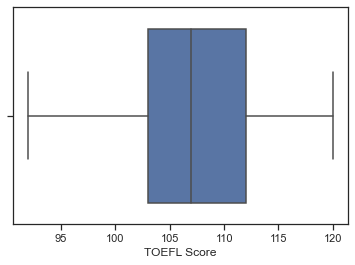

In [65]:
# Одномерное распределение вероятности
sns.boxplot(x=data['TOEFL Score'])

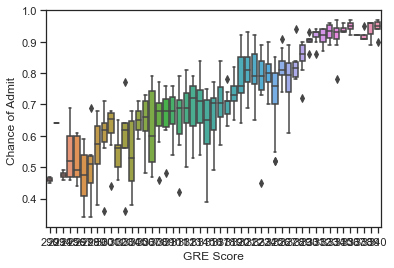

In [66]:
# Распределение параметра GRE Score сгруппированные по Chance of Admit.
sns.boxplot(x='GRE Score', y='Chance of Admit ', data=data)

## Violin plot

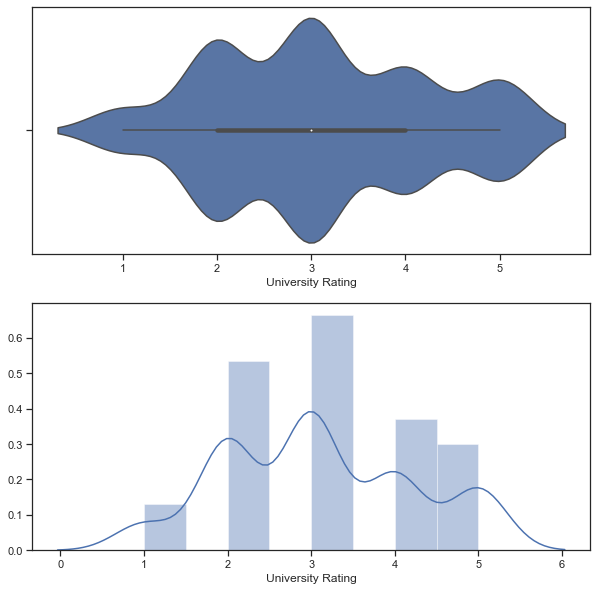

In [67]:
# Распределение плотности признака University Rating
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['University Rating'])
sns.distplot(data['University Rating'], ax=ax[1])

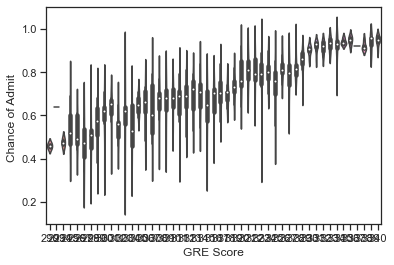

In [68]:
# Распределение параметра GRE Score сгруппированные по Chance of Admit.
sns.violinplot(x='GRE Score', y='Chance of Admit ', data=data)

## Корреляционный анализ

In [69]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [70]:

data.corr(method='spearman')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.093525,-0.146489,-0.161542,-0.170409,-0.081427,-0.042829,-0.063138,0.038328
GRE Score,-0.093525,1.000000,0.831860,0.676265,0.613743,0.547786,0.831848,0.595911,0.815352
TOEFL Score,-0.146489,0.831860,1.000000,0.696868,0.652922,0.549405,0.825720,0.504322,0.795573
University Rating,-0.161542,0.676265,0.696868,1.000000,0.740387,0.653256,0.750562,0.454131,0.731977
SOP,-0.170409,0.613743,0.652922,0.740387,1.000000,0.727178,0.724348,0.443648,0.694715
LOR,-0.081427,0.547786,0.549405,0.653256,0.727178,1.000000,0.666012,0.400385,0.670562
CGPA,-0.042829,0.831848,0.825720,0.750562,0.724348,0.666012,1.000000,0.530265,0.878403
Research,-0.063138,0.595911,0.504322,0.454131,0.443648,0.400385,0.530265,1.000000,0.581742
Chance of Admit,0.038328,0.815352,0.795573,0.731977,0.694715,0.670562,0.878403,0.581742,1.000000


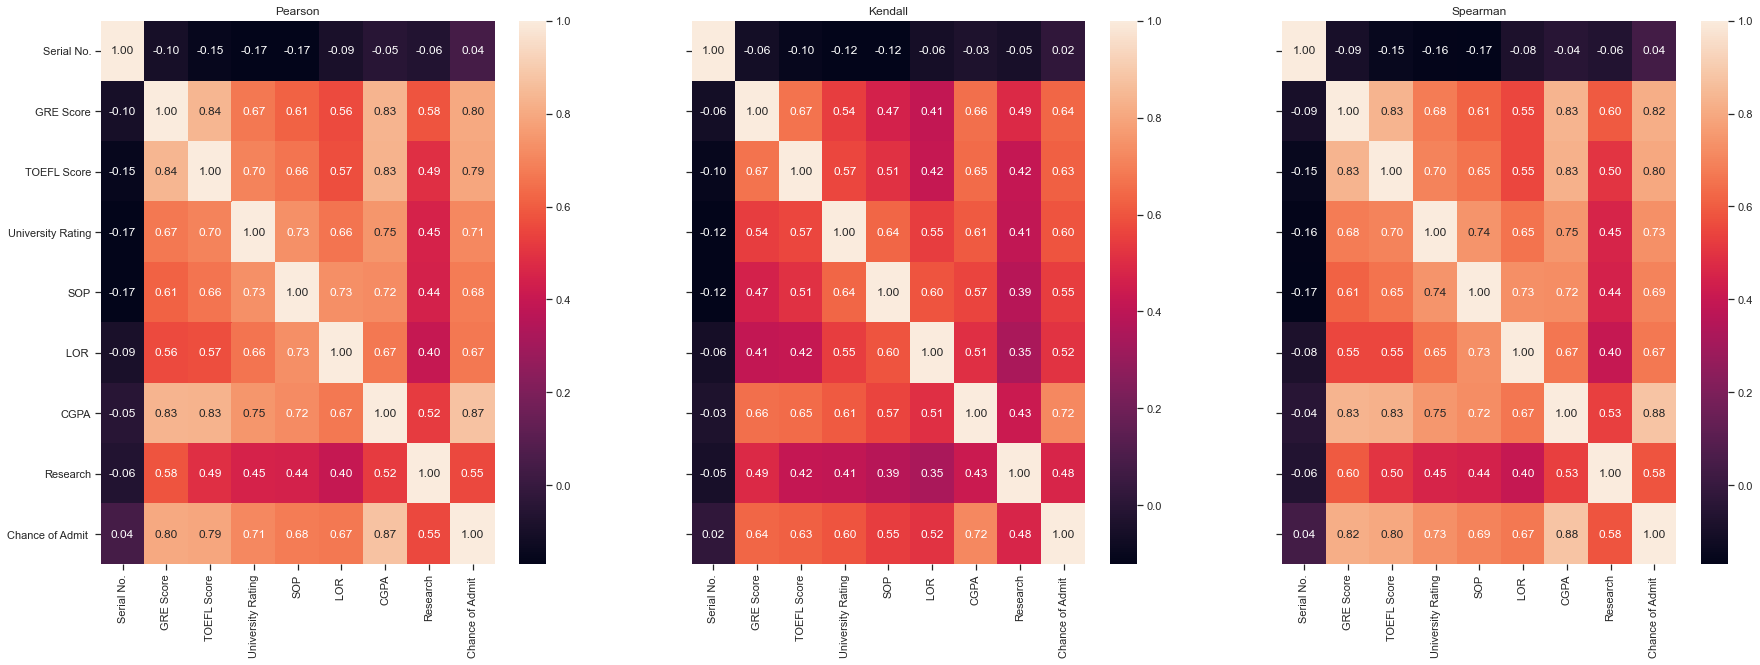

In [71]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(30,10))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

## Вывод

Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

На основе корреляционной матрицы можно сделать следующие выводы:

1. Целевой признак Chance of Admit хорошо корреллирует с остальными признаками, слабее всего с Research, что логично, т.к. это плохо формализируемый признак и он слабее влияет на Chance of Admit
2. Признаки TOEFL Score и GRE Score коррелируют друг с другом. Можно оставить в модели один из этих признаков, к примеру, TOEFL Score, они примерно одинаково коррелируют с целевым признаком.


В ходе выполнения РК1 был проведен разведочный анализ данных о прогнозе приема студентов. Были исследованы основные характеристики датасета, а также проведено визуальное исследование данных в результате которого были построены графики: диаграмма рассеяния, гистограммы распределения, joinplot(Комбинация гистограмм и диаграмм рассеивания), парные диаграммы, диаграмма "ящик с усами" и графики violin plot.

Диаграмма рассеивания позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Исследовалась взаимосвязь между признаками - GRE Score и Chance of Admit, чтобы показать влияние рейтинга GRE на шанс поступления.

Гистограмма распределения позволяет оценить плотность вероятности распределения данных. При помощи гистограммы было исследовано распределение признака Chance of Admit(шанс поступления). По гистограмме частот можно предположить, что признак описывается законом, близким к нормальному, и имеет наиболее вероятное значение, равное 0.7. 

Joinplot - комбинация гистограмм и диаграмм рассеивания. С помощью этой гистограммы исследовалась взаимосвязь между признаками - TOEFL Score и University rating. По графику видно, что чем больше рейтинг, тем лучше результаты TOEFL.

Парные диаграммы представляют комбинацию гистограмм и диаграмм рассеивания для всего набора данных. Вывод содержит множество диаграмм рассеивания и гистограмм распределения.

Диаграмма "ящик с усами" показывает одномерное распределение вероятности. Построен график по признаку TOEFL Score. На графике показаны наблюдаемый минимум - 90, максимум - 120, нижний квартиль - примерно 103, верхний квартиль - 113, медиану - 107.

На графиках violin plot по краям отображаются распределения плотности. При помощи данного вида графиков исследовался признак University Rating. Вместе с гистограммой график показывает, что наибольшее значение вероятоности приходится примерно на 3 балла.

На основании построенных графиков можно сделать вывод о том, что результаты TOEFL и GRE влияют на вероятность поступления, и чем выше результаты, тем выше вероятность. Средний рейтинг университетов - 3 балла. Признак Research слабо влияет на вероятность поступления.